In [8]:
from tqdm import tqdm
import cv2
import os
for subfolder_1 in (os.listdir(src_path)):
    for subfolder_2 in (os.listdir(src_path + subfolder_1 + '/')):
        for img_name in tqdm(os.listdir(src_path + subfolder_1 + '/' + subfolder_2 + '/')):
            img_path = src_path + subfolder_1 + '/' + subfolder_2 + '/' + img_name
            des_path = dest_path + subfolder_1 + '/' + subfolder_2 + '/'
            img = cv2.imread(img_path)
        

            width = int(128)
            height = int(128)
            dim = (width, height)

            # resize image
            resized_img = cv2.resize(img, dim)


            cv2.imwrite(os.path.join(des_path, img_name), resized_img)       

100%|██████████| 1173/1173 [01:07<00:00, 17.27it/s]


In [7]:
src_path = '/home/harsh/amk/GOOD_BAD_ND_MausumiData_for_train/'
dest_path = '/home/harsh/amk/128*128_GOOD_BAD_ND_MausumiData_for_train/'
print("")

# Your Class should be Like this Bad Quality, Good Quality, NonDiagnosable 

In [23]:
dir_list = os.path.abspath(os.curdir).split("/")
def making_folder(dir_name, data):
    os.mkdir(dir_name+'annotated by model')
    for i, class_name_1 in enumerate(data.classes):
        for j, class_name_2 in enumerate(data.classes):
                os.mkdir(dir_name+'annotated by model'+ "/" + class_name_1.split()[0]+" 2 "+ class_name_2.split()[0])
                
if len(dir_list[0]) == 0 :
    dir_name = '/'+dir_list[1]+'/'+dir_list[2]+'/'
    
    if "annotated by model" in os.listdir(dir_name):
        shutil.rmtree(dir_name+'annotated by model')
        making_folder(dir_name, data)
    else:
        making_folder(dir_name, data)
else:
    dir_name = '/'+dir_list[0]+'/'
annotated_by_model_path = dir_name+'annotated by model'    

In [24]:
def Metrics(cm, i):
    
    
    true_pred = 0
    total_data = 0
    for j in range(len(classes)):
        if i == j :
            true_pred = cm.iloc[i,j]
            total_data += true_pred
        else:
            total_data += cm.iloc[i,j]
    vars()[classes[i]+ ' Prediction'] = 'Total data = ' + str(total_data) + ', Predicted True = ' + str(true_pred) + ", Percentage of True Prediction = " + str(true_pred/total_data)       
    print(cm.index[i], " ---> ", vars()[classes[i]+ ' Prediction'])            
                

In [25]:
def inference(learn, src_path, annotated_by_model_path, training):
    cm = pd.DataFrame(0, index=['Actual '+ classes[0].split()[0],'Actual ' + classes[1].split()[0],'Actual ' + classes[2].split()[0]], columns=['Predicted '+ classes[0].split()[0],'Predicted ' + classes[1].split()[0],'Predicted '+classes[2].split()[0]])
    for subfolder_1 in (os.listdir(src_path)):
        for img_name in (os.listdir(src_path + subfolder_1 + '/')):
            img_path = src_path + subfolder_1 + '/' + img_name
            img  = open_image(img_path)
            prediction = learn.predict(img)
            
            actual_cls = subfolder_1
            predicted_cls = str(prediction[0])
            prob_of_pred = np.round(torch.max(prediction[2]).item()*100, 2)
            annotated_by_model_path = annotated_by_model_path 
            annotated_by_model(actual_cls, predicted_cls, prob_of_pred, annotated_by_model_path, img_path, training)
            cm.loc["Actual "+subfolder_1.split()[0], "Predicted " + str(prediction[0]).split()[0]] += 1 
    return cm       

In [26]:
def annotated_by_model(actual_cls, predicted_cls, prob_of_pred, annotated_by_model_path, img_path, training):
    if training == True:
        src_img_path = annotated_by_model_path+"/"+ actual_cls.split()[0]+" 2 "+predicted_cls.split()[0]+ '/'
        img_path = "/home/harsh/amk/GOOD_BAD_ND_MausumiData_for_train/Train/" + img_path.split("/")[-2]+"/"+ img_path.split("/")[-1] 
        available_img = "no"
        img_name = img_path.split("/")[-1]
        if len(os.listdir(src_img_path)) >0:
            for search_img_name in os.listdir(src_img_path):
                list_search_img_name = search_img_name.split("||")
                if img_name == list_search_img_name[2]:
                    available_img = "yes"
                    prev_val = int(list_search_img_name[0])
                    prev_prob = float(list_search_img_name[1])
                    val = prev_val + 1
                    prob = (prev_prob + prob_of_pred ) / 2
                    prob = np.round(prob,2)
                    new_img_name = str(val) + "||" + str(prob) + "||" + list_search_img_name[2]
                    os.rename(src_img_path+ search_img_name, src_img_path+ new_img_name)
            if available_img == 'no' :
                shutil.copy(img_path, src_img_path)
                new_img_name = "1||"+str(prob_of_pred)+"||"+img_name
                os.rename(src_img_path+ img_name, src_img_path+ new_img_name)

        else:
            shutil.copy(img_path, src_img_path)
            new_img_name = "1||"+str(prob_of_pred)+"||"+img_name
            os.rename(src_img_path+ img_name, src_img_path+ new_img_name)


['Bad Quality', 'Good Quality', 'NonDiagnosable']
================================================== Epoch 0 ==================================================


epoch,train_loss,valid_loss,error_rate,accuracy,auroc,recall,precision,matthews_correff,time
0,0.580192,0.365508,0.129630,0.870370,0.179164,0.857823,0.867102,0.805256,00:07


/home/harsh/anaconda3/lib/python3.7/site-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


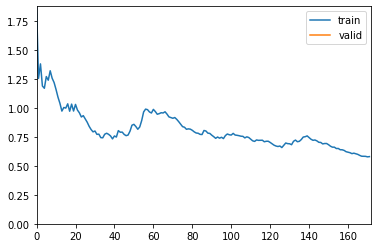

================================================== Epoch 1 ==================================================


epoch,train_loss,valid_loss,error_rate,accuracy,auroc,recall,precision,matthews_correff,time
0,0.249569,0.136932,0.043981,0.956019,0.196113,0.953403,0.952902,0.933575,00:07


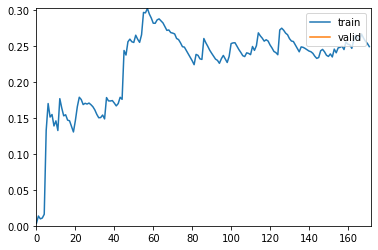

================================================== Epoch 2 ==================================================


epoch,train_loss,valid_loss,error_rate,accuracy,auroc,recall,precision,matthews_correff,time
0,0.179486,0.120017,0.034722,0.965278,0.095955,0.961828,0.964225,0.947654,00:07


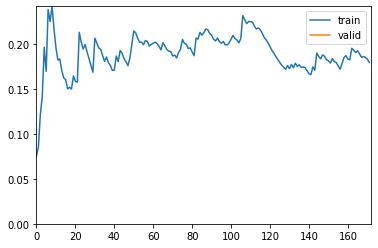

================================================== Epoch 3 ==================================================


epoch,train_loss,valid_loss,error_rate,accuracy,auroc,recall,precision,matthews_correff,time
0,0.225337,0.128237,0.043981,0.956019,0.106425,0.953403,0.952902,0.933575,00:07


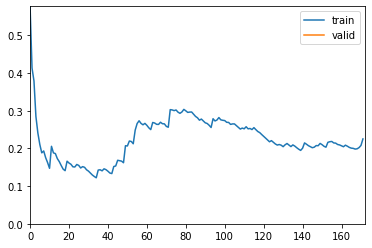

================================================== Epoch 4 ==================================================


epoch,train_loss,valid_loss,error_rate,accuracy,auroc,recall,precision,matthews_correff,time
0,0.270572,0.098779,0.034722,0.965278,0.151507,0.961828,0.963504,0.947642,00:07


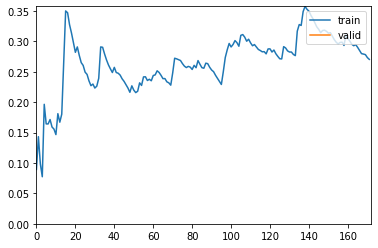

================================================== Epoch 5 ==================================================


epoch,train_loss,valid_loss,error_rate,accuracy,auroc,recall,precision,matthews_correff,time
0,0.215469,0.119909,0.041667,0.958333,0.109069,0.954994,0.956020,0.937018,00:07


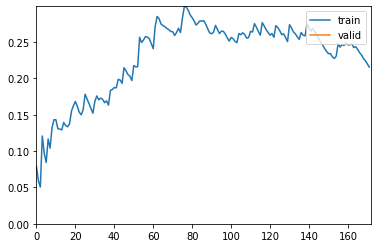

================================================== Epoch 6 ==================================================


epoch,train_loss,valid_loss,error_rate,accuracy,auroc,recall,precision,matthews_correff,time
0,0.205791,0.113281,0.034722,0.965278,0.119566,0.959851,0.966037,0.948341,00:07


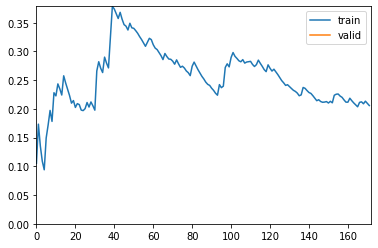

================================================== Epoch 7 ==================================================


epoch,train_loss,valid_loss,error_rate,accuracy,auroc,recall,precision,matthews_correff,time
0,0.185302,0.113162,0.034722,0.965278,0.212903,0.960993,0.965084,0.948006,00:07


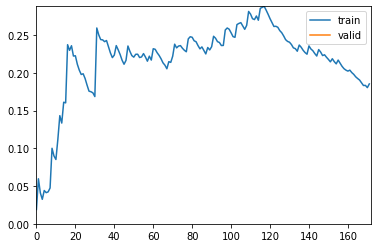

================================================== Epoch 8 ==================================================


epoch,train_loss,valid_loss,error_rate,accuracy,auroc,recall,precision,matthews_correff,time
0,0.203317,0.124348,0.041667,0.958333,0.141433,0.954994,0.956325,0.937053,00:07


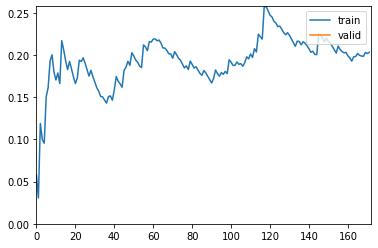

================================================== Epoch 9 ==================================================


epoch,train_loss,valid_loss,error_rate,accuracy,auroc,recall,precision,matthews_correff,time
0,0.213126,0.106734,0.037037,0.962963,0.137652,0.958678,0.962090,0.944387,00:07


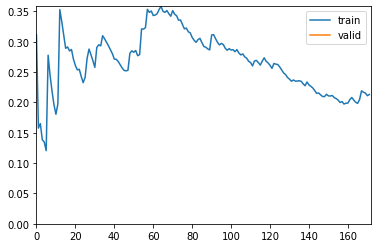

Actual Bad  --->  Total data = 720, Predicted True = 708, Percentage of True Prediction = 0.9833333333333333
Actual Good  --->  Total data = 600, Predicted True = 567, Percentage of True Prediction = 0.945
Actual NonDiagnosable  --->  Total data = 840, Predicted True = 833, Percentage of True Prediction = 0.9916666666666667
                       Predicted Bad  Predicted Good  Predicted NonDiagnosable
Actual Bad                       708              11                         1
Actual Good                       33             567                         0
Actual NonDiagnosable              7               0                       833
================================================== Epoch 10 ==================================================


epoch,train_loss,valid_loss,error_rate,accuracy,auroc,recall,precision,matthews_correff,time
0,0.185211,0.107268,0.032407,0.967593,0.137308,0.965395,0.964826,0.951033,00:07


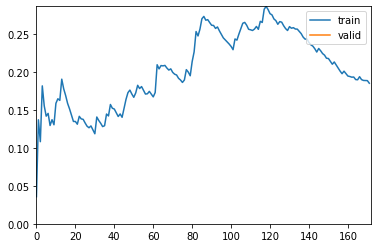

Actual Bad  --->  Total data = 720, Predicted True = 696, Percentage of True Prediction = 0.9666666666666667
Actual Good  --->  Total data = 600, Predicted True = 586, Percentage of True Prediction = 0.9766666666666667
Actual NonDiagnosable  --->  Total data = 840, Predicted True = 833, Percentage of True Prediction = 0.9916666666666667
                       Predicted Bad  Predicted Good  Predicted NonDiagnosable
Actual Bad                       696              24                         0
Actual Good                       14             586                         0
Actual NonDiagnosable              6               1                       833
================================================== Epoch 11 ==================================================


epoch,train_loss,valid_loss,error_rate,accuracy,auroc,recall,precision,matthews_correff,time
0,0.228763,0.117973,0.048611,0.951389,0.102803,0.950026,0.948123,0.927462,00:07


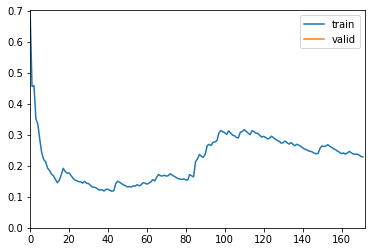

Actual Bad  --->  Total data = 720, Predicted True = 683, Percentage of True Prediction = 0.9486111111111111
Actual Good  --->  Total data = 600, Predicted True = 594, Percentage of True Prediction = 0.99
Actual NonDiagnosable  --->  Total data = 840, Predicted True = 834, Percentage of True Prediction = 0.9928571428571429
                       Predicted Bad  Predicted Good  Predicted NonDiagnosable
Actual Bad                       683              34                         3
Actual Good                        6             594                         0
Actual NonDiagnosable              5               1                       834
================================================== Epoch 12 ==================================================


epoch,train_loss,valid_loss,error_rate,accuracy,auroc,recall,precision,matthews_correff,time
0,0.250829,0.124572,0.037037,0.962963,0.126653,0.961293,0.960201,0.944571,00:07


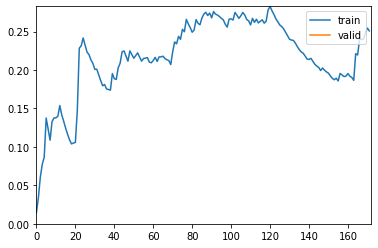

Actual Bad  --->  Total data = 720, Predicted True = 676, Percentage of True Prediction = 0.9388888888888889
Actual Good  --->  Total data = 600, Predicted True = 592, Percentage of True Prediction = 0.9866666666666667
Actual NonDiagnosable  --->  Total data = 840, Predicted True = 838, Percentage of True Prediction = 0.9976190476190476
                       Predicted Bad  Predicted Good  Predicted NonDiagnosable
Actual Bad                       676              43                         1
Actual Good                        7             592                         1
Actual NonDiagnosable              2               0                       838
================================================== Epoch 13 ==================================================


epoch,train_loss,valid_loss,error_rate,accuracy,auroc,recall,precision,matthews_correff,time
0,0.159671,0.111838,0.032407,0.967593,0.192200,0.964560,0.965724,0.951091,00:07


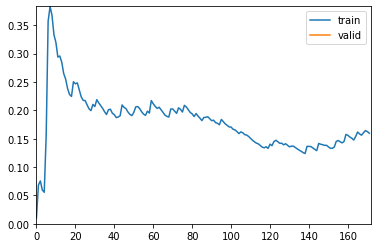

Actual Bad  --->  Total data = 720, Predicted True = 712, Percentage of True Prediction = 0.9888888888888889
Actual Good  --->  Total data = 600, Predicted True = 584, Percentage of True Prediction = 0.9733333333333334
Actual NonDiagnosable  --->  Total data = 840, Predicted True = 830, Percentage of True Prediction = 0.9880952380952381
                       Predicted Bad  Predicted Good  Predicted NonDiagnosable
Actual Bad                       712               8                         0
Actual Good                       16             584                         0
Actual NonDiagnosable              9               1                       830
================================================== Epoch 14 ==================================================


epoch,train_loss,valid_loss,error_rate,accuracy,auroc,recall,precision,matthews_correff,time
0,0.192475,0.143400,0.055556,0.944444,0.091698,0.941105,0.941312,0.916347,00:07


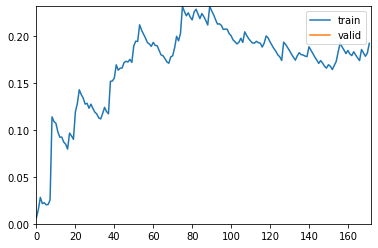

Actual Bad  --->  Total data = 720, Predicted True = 684, Percentage of True Prediction = 0.95
Actual Good  --->  Total data = 600, Predicted True = 591, Percentage of True Prediction = 0.985
Actual NonDiagnosable  --->  Total data = 840, Predicted True = 834, Percentage of True Prediction = 0.9928571428571429
                       Predicted Bad  Predicted Good  Predicted NonDiagnosable
Actual Bad                       684              26                        10
Actual Good                        9             591                         0
Actual NonDiagnosable              3               3                       834
================================================== Epoch 15 ==================================================


epoch,train_loss,valid_loss,error_rate,accuracy,auroc,recall,precision,matthews_correff,time
0,0.173323,0.120055,0.037037,0.962963,0.243628,0.958371,0.961265,0.944177,00:07


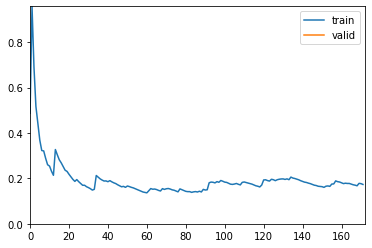

Actual Bad  --->  Total data = 720, Predicted True = 712, Percentage of True Prediction = 0.9888888888888889
Actual Good  --->  Total data = 600, Predicted True = 575, Percentage of True Prediction = 0.9583333333333334
Actual NonDiagnosable  --->  Total data = 840, Predicted True = 838, Percentage of True Prediction = 0.9976190476190476
                       Predicted Bad  Predicted Good  Predicted NonDiagnosable
Actual Bad                       712               8                         0
Actual Good                       23             575                         2
Actual NonDiagnosable              2               0                       838
================================================== Epoch 16 ==================================================


epoch,train_loss,valid_loss,error_rate,accuracy,auroc,recall,precision,matthews_correff,time
0,0.190601,0.143113,0.055556,0.944444,0.171021,0.941522,0.940494,0.916659,00:07


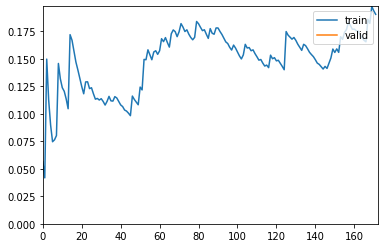

Actual Bad  --->  Total data = 720, Predicted True = 686, Percentage of True Prediction = 0.9527777777777777
Actual Good  --->  Total data = 600, Predicted True = 587, Percentage of True Prediction = 0.9783333333333334
Actual NonDiagnosable  --->  Total data = 840, Predicted True = 839, Percentage of True Prediction = 0.9988095238095238
                       Predicted Bad  Predicted Good  Predicted NonDiagnosable
Actual Bad                       686              28                         6
Actual Good                       13             587                         0
Actual NonDiagnosable              1               0                       839
================================================== Epoch 17 ==================================================


epoch,train_loss,valid_loss,error_rate,accuracy,auroc,recall,precision,matthews_correff,time
0,0.163237,0.148371,0.053241,0.946759,0.167821,0.944340,0.942613,0.919710,00:07


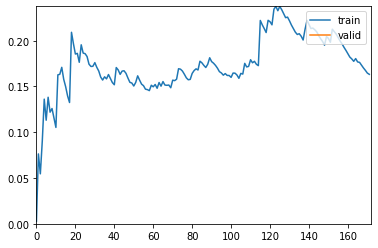

Actual Bad  --->  Total data = 720, Predicted True = 702, Percentage of True Prediction = 0.975
Actual Good  --->  Total data = 600, Predicted True = 585, Percentage of True Prediction = 0.975
Actual NonDiagnosable  --->  Total data = 840, Predicted True = 835, Percentage of True Prediction = 0.9940476190476191
                       Predicted Bad  Predicted Good  Predicted NonDiagnosable
Actual Bad                       702              17                         1
Actual Good                       15             585                         0
Actual NonDiagnosable              5               0                       835
================================================== Epoch 18 ==================================================


epoch,train_loss,valid_loss,error_rate,accuracy,auroc,recall,precision,matthews_correff,time
0,0.146315,0.109953,0.041667,0.958333,0.160603,0.954576,0.955132,0.936995,00:07


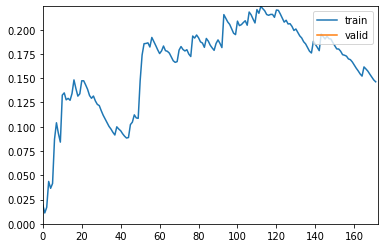

Actual Bad  --->  Total data = 720, Predicted True = 704, Percentage of True Prediction = 0.9777777777777777
Actual Good  --->  Total data = 600, Predicted True = 584, Percentage of True Prediction = 0.9733333333333334
Actual NonDiagnosable  --->  Total data = 840, Predicted True = 840, Percentage of True Prediction = 1.0
                       Predicted Bad  Predicted Good  Predicted NonDiagnosable
Actual Bad                       704              14                         2
Actual Good                       16             584                         0
Actual NonDiagnosable              0               0                       840
================================================== Epoch 19 ==================================================


epoch,train_loss,valid_loss,error_rate,accuracy,auroc,recall,precision,matthews_correff,time
0,0.139937,0.137341,0.037037,0.962963,0.114807,0.959206,0.960649,0.944023,00:07


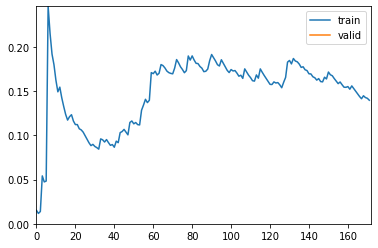

Actual Bad  --->  Total data = 720, Predicted True = 710, Percentage of True Prediction = 0.9861111111111112
Actual Good  --->  Total data = 600, Predicted True = 581, Percentage of True Prediction = 0.9683333333333334
Actual NonDiagnosable  --->  Total data = 840, Predicted True = 839, Percentage of True Prediction = 0.9988095238095238
                       Predicted Bad  Predicted Good  Predicted NonDiagnosable
Actual Bad                       710               9                         1
Actual Good                       18             581                         1
Actual NonDiagnosable              1               0                       839


In [27]:
# src for predition
src_path = path + "Train/"

classes = data.classes
epoch = 20
arch = 'resnet50.pkl'
training = True
print(data.classes)



for i in range(epoch):
    print('=='*25+' Epoch ' +str(i) + ' ' +'=='*25)
    if i == 0:
        learn = cnn_learner(data, models.resnet50,callback_fns=ShowGraph, \
                             metrics=[error_rate, accuracy, AUROC(), Recall(), \
                             Precision(),MatthewsCorreff()])
        defaults.device = torch.device('cuda')
        learn.fit_one_cycle(1)
        if i> 8:
            cm = inference(learn, src_path, annotated_by_model_path, training)
            for i in range(len(classes)):
                Metrics(cm, i)           
            print(cm)        
            learn.export(arch, destroy = False)
    else:    
        learn = load_learner(path, arch)
        learn.data=data
        defaults.device = torch.device('cuda')
        learn.fit_one_cycle(1)
        if i>8:
            cm = inference(learn, src_path, annotated_by_model_path, training)
            for i in range(len(classes)):
                Metrics(cm, i)           
            print(cm)      
            learn.export(arch, destroy = False)

# Model performance with given class label

In [5]:
def cadene_model(model_name):
    def my_model(pretrained = True, **kwargs):
        return pretrainedmodels.__dict__[model_name](num_classes=1000, pretrained='imagenet')
    return my_model

In [6]:
#model = cadene_model('resnet18')
path_of_trained_model = path + 'models' + '/' + 'shufflenet_v2_x1_0'
learn = cnn_learner(data, models.resnet34, pretrained = True, callback_fns=ShowGraph, \
                             metrics=[error_rate, accuracy, AUROC(), Recall(), \
                             Precision(),MatthewsCorreff()])

#learn.load(path+'models'+ '/'+ 'shufflenet_v2_x1_0')
defaults.device = torch.device('cuda') #makes sure the gpu is used
#learn.fit_one_cycle(2, callbacks = callbacks.SaveModelCallback(learn,monitor='auroc',mode='max'))
#print(model_name)
learn.fit_one_cycle(10)
architecture = 'shufflenet_v2_x1_0'
model_file = architecture + '.pkl'
learn.export(model_file, destroy = False)

epoch,train_loss,valid_loss,error_rate,accuracy,auroc,recall,precision,matthews_correff,time


KeyboardInterrupt: 

In [16]:
learn.save(architecture)

epoch,train_loss,valid_loss,error_rate,accuracy,auroc,recall,precision,matthews_correff,time
0,0.684842,0.458439,0.190121,0.809879,0.064842,0.637125,0.713557,0.640177,00:08


/home/harsh/anaconda3/lib/python3.7/site-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


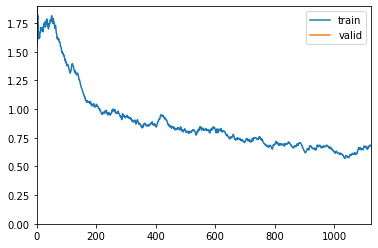

epoch,train_loss,valid_loss,error_rate,accuracy,auroc,recall,precision,matthews_correff,time
0,0.593248,0.431509,0.167022,0.832978,0.066549,0.638676,0.753790,0.681697,00:08


/home/harsh/anaconda3/lib/python3.7/site-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


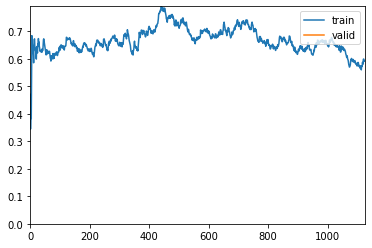

epoch,train_loss,valid_loss,error_rate,accuracy,auroc,recall,precision,matthews_correff,time
0,0.569019,0.429086,0.174129,0.825871,0.080161,0.665140,0.708981,0.671743,00:07


/home/harsh/anaconda3/lib/python3.7/site-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


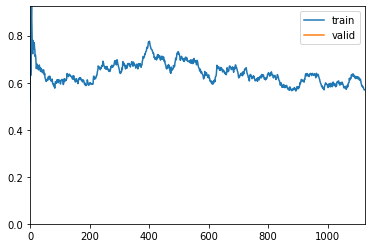

epoch,train_loss,valid_loss,error_rate,accuracy,auroc,recall,precision,matthews_correff,time
0,0.538975,0.413062,0.161336,0.838664,0.053298,0.646857,0.758963,0.693284,00:08


/home/harsh/anaconda3/lib/python3.7/site-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


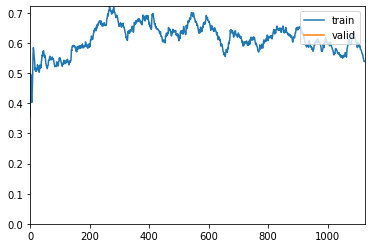

In [4]:
epoch = 4
architecture = 'shufflenet_v2_x1_0'
for i in range(epoch):
    if i== 0:
        learn = cnn_learner(data, models.resnet18, pretrained = True, callback_fns=ShowGraph, \
                             metrics=[error_rate, accuracy, AUROC(), Recall(), \
                             Precision(),MatthewsCorreff()])
        defaults.device = torch.device('cuda')
        learn.fit_one_cycle(1)
        learn.save(architecture)
        model_file = architecture + '.pkl'
        learn.export(model_file, destroy = False)
    else:
        learn = cnn_learner(data, models.shufflenet_v2_x1_0, pretrained = True, callback_fns=ShowGraph, \
                             metrics=[error_rate, accuracy, AUROC(), Recall(), \
                             Precision(),MatthewsCorreff()])
        learn.load(path+'models'+ '/'+ 'shufflenet_v2_x1_0')
        learn.fit_one_cycle(1)
        learn.save(architecture)
        architecture = 'shufflenet_v2_x1_0'
        model_file = architecture + '.pkl'
        learn.export(model_file, destroy = False)

In [36]:
os.path.abspath(img_path).split("/")[-1]

'ARMD R AATHIAMMAL_A_01-01-1939_1343_(0003).jpg'

In [ ]:
def cadene_model(model_name):
    def my_model(pretrained = True, **kwargs):
        return pretrainedmodels.__dict__[model_name](num_classes=1000, pretrained='imagenet')
    return my_model

#model = cadene_model('resnet18')
path_of_trained_model = path + 'models' + '/' + 'shufflenet_v2_x1_0'
learn = cnn_learner(data, models.resnet34, pretrained = True, callback_fns=ShowGraph, \
                             metrics=[error_rate, accuracy, AUROC(), Recall(), \
                             Precision(),MatthewsCorreff()])

#learn.load(path+'models'+ '/'+ 'shufflenet_v2_x1_0')
defaults.device = torch.device('cuda') #makes sure the gpu is used
#learn.fit_one_cycle(2, callbacks = callbacks.SaveModelCallback(learn,monitor='auroc',mode='max'))
#print(model_name)
learn.fit_one_cycle(10)
architecture = 'shufflenet_v2_x1_0'
model_file = architecture + '.pkl'
learn.export(model_file, destroy = False)





learn.save(architecture)

epoch = 4
architecture = 'shufflenet_v2_x1_0'
for i in range(epoch):
    if i== 0:
        learn = cnn_learner(data, models.resnet18, pretrained = True, callback_fns=ShowGraph, \
                             metrics=[error_rate, accuracy, AUROC(), Recall(), \
                             Precision(),MatthewsCorreff()])
        defaults.device = torch.device('cuda')
        learn.fit_one_cycle(1)
        learn.save(architecture)
        model_file = architecture + '.pkl'
        learn.export(model_file, destroy = False)
    else:
        learn = cnn_learner(data, models.shufflenet_v2_x1_0, pretrained = True, callback_fns=ShowGraph, \
                             metrics=[error_rate, accuracy, AUROC(), Recall(), \
                             Precision(),MatthewsCorreff()])
        learn.load(path+'models'+ '/'+ 'shufflenet_v2_x1_0')
        learn.fit_one_cycle(1)
        learn.save(architecture)
        architecture = 'shufflenet_v2_x1_0'
        model_file = architecture + '.pkl'
        learn.export(model_file, destroy = False)





os.path.abspath(img_path).split("/")[-1]

